# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

In [2]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [6]:
print(da.DMDMARTL.unique())

[ 1.  3.  6.  4.  5. nan  2. 77.]


In [9]:
# Relabel DMDMARTL
da['DMDMARTLx'] = da['DMDMARTL'].replace({1:'Married',2:'Widowed',3:'Divorced',4:'Separated', 5:'Never Married',
                                          6:'Living w Partner',77:'Refused', None:'Missing'})

print(da.DMDMARTLx.unique())

['Married' 'Divorced' 'Living w Partner' 'Separated' 'Never Married'
 'Missing' 'Widowed' 'Refused']


In [10]:
# Frequency Table - All Respondents
da.DMDMARTLx.value_counts()

Married             2780
Never Married       1004
Divorced             579
Living w Partner     527
Widowed              396
Missing              261
Separated            186
Refused                2
Name: DMDMARTLx, dtype: int64

In [16]:
# Label gender
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
print(da['RIAGENDRx'].unique())

['Male' 'Female']


In [20]:
# Frequency Table - Male Respondents Only
m = da[da['RIAGENDRx'] == 'Male'].DMDMARTLx.value_counts()

m / m.sum()

Married             0.535339
Never Married       0.175426
Living w Partner    0.096049
Divorced            0.083001
Missing             0.048931
Widowed             0.036245
Separated           0.024647
Refused             0.000362
Name: DMDMARTLx, dtype: float64

In [21]:
# Frequency Table - Female Respondents Only
f = da[da['RIAGENDRx'] == 'Female'].DMDMARTLx.value_counts()

f / f.sum()

Married             0.437836
Never Married       0.174731
Divorced            0.117608
Widowed             0.099462
Living w Partner    0.088038
Missing             0.042339
Separated           0.039651
Refused             0.000336
Name: DMDMARTLx, dtype: float64

In [22]:
# Frequency Table - All Respondents between 30 and 40 years old
age = da[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)].DMDMARTLx.value_counts()

age / age.sum()

Married             0.545809
Never Married       0.211501
Living w Partner    0.139376
Divorced            0.068226
Separated           0.029240
Widowed             0.004873
Refused             0.000975
Name: DMDMARTLx, dtype: float64

In [27]:
# Frequency Table - Female Respondents between 30 and 40 years old
f_age = da[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) & (da['RIAGENDRx'] == 'Female')].DMDMARTLx.value_counts()

print('\033[1m'+ "30 - 40" + '\033[0m')
print(f_age / f_age.sum())
print("")
print('\033[1m'+"All Men"+ '\033[0m')
print(f / f.sum())

Married             0.535714
Never Married       0.218045
Living w Partner    0.122180
Divorced            0.086466
Separated           0.033835
Widowed             0.003759
Name: DMDMARTLx, dtype: float64

In [34]:
# Frequency Table - Male Respondents between 30 and 40 years old
m_age = da[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40) & (da['RIAGENDRx'] == 'Male')].DMDMARTLx.value_counts()

print('\033[1m'+ "30 - 40" + '\033[0m')
print(m_age / m_age.sum())
print("")
print('\033[1m'+"All Men"+ '\033[0m')
print(m / m.sum())

30 - 40
Married             0.556680
Never Married       0.204453
Living w Partner    0.157895
Divorced            0.048583
Separated           0.024291
Widowed             0.006073
Refused             0.002024
Name: DMDMARTLx, dtype: float64

All Men
Married             0.535339
Never Married       0.175426
Living w Partner    0.096049
Divorced            0.083001
Missing             0.048931
Widowed             0.036245
Separated           0.024647
Refused             0.000362
Name: DMDMARTLx, dtype: float64


__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

Less than half of the female respondents are married, whereas 53% of men are married. Women are more likely to be divorced or Widowed than men. Slightly more men are living with their partner and slightly more women are separated. Never Married rates are the same between the two groups.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [40]:
# Create age strata based on these cut points
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 25, 32, 40, 50, 60, 70, 80]) 

# Calc Frequency
f_agegrp = da[da['RIAGENDRx'] == 'Female'].groupby("agegrp")["DMDMARTLx"].value_counts()

# Present as proportion
f_agegrp / f_agegrp.groupby("agegrp").sum()

agegrp    DMDMARTLx       
(18, 25]  Never Married       0.498480
          Missing             0.170213
          Living w Partner    0.164134
          Married             0.133739
          Separated           0.024316
          Divorced            0.009119
(25, 32]  Married             0.419948
          Never Married       0.320210
          Living w Partner    0.199475
          Divorced            0.044619
          Separated           0.015748
(32, 40]  Married             0.568365
          Never Married       0.187668
          Living w Partner    0.109920
          Divorced            0.091153
          Separated           0.037534
          Widowed             0.005362
(40, 50]  Married             0.573705
          Divorced            0.137450
          Never Married       0.125498
          Living w Partner    0.073705
          Separated           0.065737
          Widowed             0.023904
(50, 60]  Married             0.546809
          Divorced            0.17659

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [41]:
# Calc Frequency
m_agegrp = da[da['RIAGENDRx'] == 'Male'].groupby("agegrp")["DMDMARTLx"].value_counts()

# Present as proportion
m_agegrp / m_agegrp.groupby("agegrp").sum()

agegrp    DMDMARTLx       
(18, 25]  Never Married       0.570988
          Missing             0.222222
          Living w Partner    0.104938
          Married             0.092593
          Separated           0.006173
          Divorced            0.003086
(25, 32]  Married             0.375405
          Never Married       0.346278
          Living w Partner    0.239482
          Separated           0.022654
          Divorced            0.009709
          Widowed             0.006472
(32, 40]  Married             0.585366
          Living w Partner    0.159892
          Never Married       0.159892
          Divorced            0.059621
          Separated           0.027100
          Widowed             0.005420
          Refused             0.002710
(40, 50]  Married             0.703242
          Never Married       0.097257
          Divorced            0.084788
          Living w Partner    0.082294
          Separated           0.027431
          Widowed             0.00498

The peak age band for married men is between 40 and 50 years old at over 70% of respondents. Younger people are more likely to be never married or living with their partner, but older men are far more likely to be married than any other status.

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

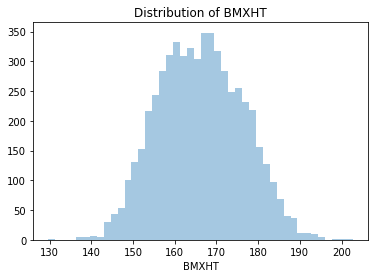

In [47]:
sns.distplot(da['BMXHT'].dropna(),kde = False).set_title("Distribution of BMXHT")
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

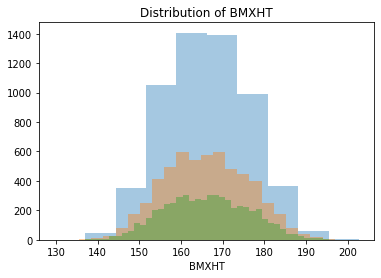

In [51]:
sns.distplot(da['BMXHT'].dropna(),kde = False, bins = 10).set_title("Distribution of BMXHT")
sns.distplot(da['BMXHT'].dropna(),kde = False, bins = 25).set_title("Distribution of BMXHT")
sns.distplot(da['BMXHT'].dropna(),kde = False, bins = 50).set_title("Distribution of BMXHT")
plt.show()

If too many bins are used, frequency counts get too small and the distribution becomes too spread out, making it harder to clearly identify peaks. Using too few bins, however, can mask nuances in the histogram such as a bimodal distribution.

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

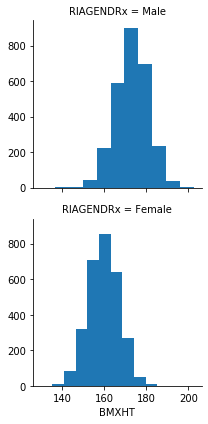

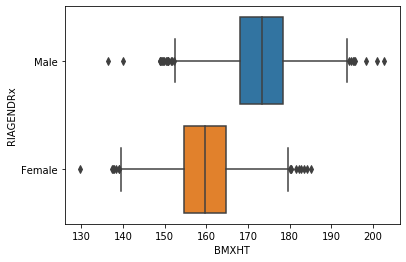

In [54]:
g = sns.FacetGrid(da, row = "RIAGENDRx")
g = g.map(plt.hist, "BMXHT") 
plt.show()

sns.boxplot(x = da["BMXHT"], y = da["RIAGENDRx"])
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

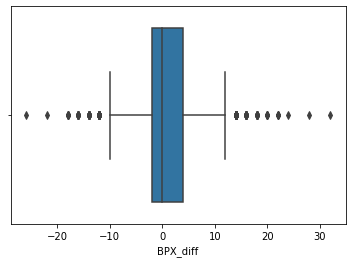

count    5369.000000
mean        0.674986
std         5.046465
min       -26.000000
25%        -2.000000
50%         0.000000
75%         4.000000
max        32.000000
Name: BPX_diff, dtype: float64

In [78]:
da['BPX_diff'] = da['BPXSY1'] - da['BPXSY2']
sns.boxplot(x = da['BPX_diff'])
plt.show()

da['BPX_diff'].describe()

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

Median is at 0 so about 50% of subjects have a lower SBP reading the second time.

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

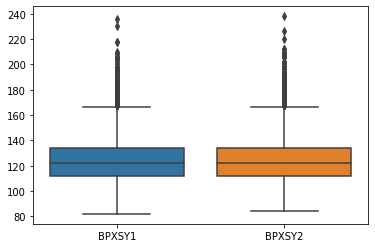

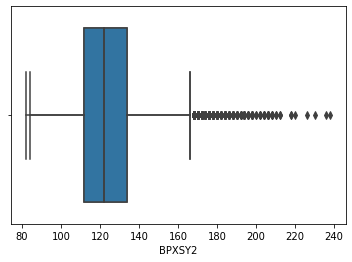

,BPXSY1,BPXSY2
count,5401.000000,5535.000000
mean,125.084614,124.783017
std,18.480873,18.527012
min,82.000000,84.000000
25%,112.000000,112.000000
50%,122.000000,122.000000
75%,134.000000,134.000000
max,236.000000,238.000000


In [77]:
sns.boxplot(data = da[['BPXSY1','BPXSY2']], orient = 'v')
plt.show()

sns.boxplot(da['BPXSY1'])
sns.boxplot(da['BPXSY2'])
plt.show()

da[['BPXSY1','BPXSY2']].describe()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [92]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

#print(da['DMDHHSIZ'].describe())
da["DMDHHSIZ_grp"] = pd.cut(da.DMDHHSIZ, [0,2,4,7]) 

edu = da.groupby("DMDHHSIZ_grp")["DMDEDUC2x"].value_counts()
edu = edu.unstack()
edu = edu.apply(lambda x: x/x.sum(), axis=1)
edu = edu[['<9','9-11','HS/GED','Some college/AA','College',"Don't know"]]
print(edu.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

DMDEDUC2x       <9  9-11  HS/GED  Some college/AA  College  Don't know
DMDHHSIZ_grp                                                          
(0, 2]       0.096 0.095   0.219            0.297    0.292       0.001
(2, 4]       0.098 0.109   0.212            0.316    0.264         NaN
(4, 7]       0.191 0.168   0.218            0.267    0.155       0.001


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [99]:
edu_3040 = da[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)]
edu_3040.groupby(['DMDEDUC2x','RIAGENDRx'])['DMDHHSIZ'].median().unstack()

RIAGENDRx,Female,Male
DMDEDUC2x,,
9-11,5.0,4.5
<9,5.0,5.0
College,3.0,3.0
HS/GED,5.0,4.0
Some college/AA,4.0,4.0


## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [106]:
mvu = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR']).agg(mean_age = ('RIDAGEYR','mean'), mean_height = ('BMXHT','mean'), 
                                       mean_BMI = ('BMXBMI','mean'))

print(mvu)

                            mean_age  mean_height   mean_BMI
SDMVSTRA SDMVPSU RIAGENDR                                   
119      1       1         47.861111   172.741667  26.958333
                 2         47.663265   159.570408  30.052041
         2       1         54.363636   172.906818  27.160465
                 2         52.987952   159.244578  27.849398
120      1       1         43.130000   169.537755  30.939175
                 2         43.636364   155.402041  32.419388
         2       1         45.219178   173.075342  27.727397
                 2         43.736111   159.218056  27.400000
121      1       1         46.750000   172.177885  29.416505
                 2         44.397959   158.871579  30.856842
         2       1         42.063158   174.764516  26.273118
                 2         44.376344   160.229032  26.470968
122      1       1         44.653061   173.998969  28.528866
                 2         42.897436   161.315385  29.447436
         2       1      

In [ ]:
ratio = mvu.apply(lambda x: x.max()/x.min(), axis=0)

print(ratio)

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [116]:
iqr = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])[['RIDAGEYR','BMXHT','BMXBMI']].apply(lambda x: x.quantile(q=0.75) - x.quantile(q=0.25))

ratio_iqr = iqr.apply(lambda x: x.max()/x.min(), axis=0)

ratio_iqr

RIDAGEYR    1.831325
BMXHT       1.623762
BMXBMI      2.865854
dtype: float64

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.